# Comparing Speech Analytics Models

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random as rd

## Loading csv files

In [4]:
# load the real file
df_real = pd.read_csv('real.csv', names=['file', 'transcript'])
# load the model file
df_model = pd.read_csv('no_ipa.csv', names=['file', 'transcript'])


## Comparing Two lines

In [5]:
# function that neutralizes the string
def neutralize(a_string):
    return a_string.lower()

# function that calculates percentage of similarity
def similarity_score(string_real, string_model, extra_info=False):

    # cut strings to bag of words
    words_real = neutralize(string_real).split(' ')
    count = 0
    error_words = []
    for word in words_real:
        # search word in string_model
        if word in neutralize(string_model):
            count = count + 1
        else:
            error_words.append(word)

    score = count / len(words_real)
    if extra_info:
        return score, error_words

    return score

In [6]:
scr, failed_words = similarity_score(df_real['transcript'][0], df_model['transcript'][0],
                                     extra_info=True)
print(scr)
print(failed_words)

0.8
['alo', 'tardes?', 'hablo', 'perez', 'conversacion', 'socofin', 'credichile', 'inpago', 'credito', 'dosmil', 'veinte,', 'cancelo', 'dia']


## Comparing two dataframes
To compare two dataframes we can use the function we just made but taking care that we
use the correct file from each row.

In [7]:
def similarity_score_dataframes(_df_real, _df_model):
    score_list = []

    for a_file, a_string in zip(_df_model['file'], _df_model['transcript']):
        # first, we search for file in real
        real_str = _df_real[_df_real['file']==a_file]['transcript']

        # files should be 1:1, if not, we riot
        if len(real_str) != 1:
            AttributeError('Dude files are not 1:1 in ' + a_file)

        # otherwise let's continue calculating the score
        print(real_str.array)
        score, fails = similarity_score(real_str.array[0], a_string, extra_info=True)
        score_list.append((a_file, score, fails))

    return pd.DataFrame(score_list, columns=['file', 'score', 'failed_words'])

In [8]:
scr_list = similarity_score_dataframes(df_real, df_model)
scr_list.head()


<PandasArray>
['alo buenas tardes? hablo con don manuel perez rojo si don manuel habla con su ejecutiva virtual para su seguridad esta conversacion podría ser grabada lo estamos llamando de Socofin por encargo de Banco CrediChile para informarle que se encuentra inpago su credito de consumo con fecha cinco de noviembre de dosmil veinte, si usted ya cancelo favor omitir este mensaje que tenga buen dia']
Length: 1, dtype: object
<PandasArray>
['alo buenas tardes? hablo con don manuel perez rojo si don manuel habla con su ejecutiva virtual para su seguridad esta conversacion podría ser grabada lo estamos llamando de Socofin por encargo de Banco CrediChile para informarle que se encuentra inpago su credito de consumo con fecha cinco de noviembre de dosmil veinte, si usted ya cancelo favor omitir este mensaje que tenga buen dia']
Length: 1, dtype: object


,file,score,failed_words
0,100884402_995867770_100179896630201118_2020111...,0.8,"[alo, tardes?, hablo, perez, conversacion, soc..."
1,100884402_995867770_100179896630201118_2020111...,0.8,"[alo, tardes?, hablo, perez, conversacion, soc..."


## Example plot for model comparison
We use seaborn box-plots to check performance between two models.

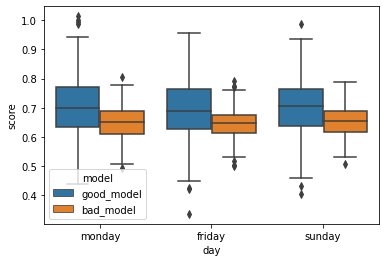

In [34]:
# we simulate to score lists
N = 1000
days = ['monday', 'friday', 'sunday']
good_model = [rd.gauss(0.7, 0.1) for i in range(N)]
bad_model = [rd.gauss(0.65, 0.05) for j in range(N)]

# transform my two lists in a dataframe
good_tuples = [('good_model', a_score, days[index%3]) for index, a_score in enumerate(good_model)]
bad_tuples = [('bad_model', a_score, days[index%3]) for index, a_score in enumerate(bad_model)]

df = pd.DataFrame(good_tuples + bad_tuples, columns=['model', 'score', 'day'])

sb.boxplot(data=df, x='day', y='score', hue='model')
plt.show()
